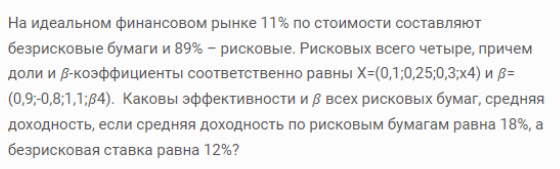

In [1]:
# Заданные значения
risk_free_rate = 0.12  # 12%
average_return_risky = 0.18  # 18%

# Weights and beta coefficients for the risky assets
weights = [0.1, 0.25, 0.3]  # Weights for the first three assets
betas = [0.9, -0.8, 1.1, 0.84]  # Beta coefficients for all four assets

# Calculating the weight of the fourth asset so that the sum of weights equals 1 (or 100%)
weight_fourth_asset = 1 - sum(weights)
weights.append(weight_fourth_asset)

# Calculating the expected return for each risky asset
expected_returns = []
for i in range(4):
    expected_return = risk_free_rate + betas[i] * (average_return_risky - risk_free_rate)
    expected_returns.append(expected_return)

expected_returns, weights


([0.174, 0.072, 0.186, 0.1704], [0.1, 0.25, 0.3, 0.3500000000000001])

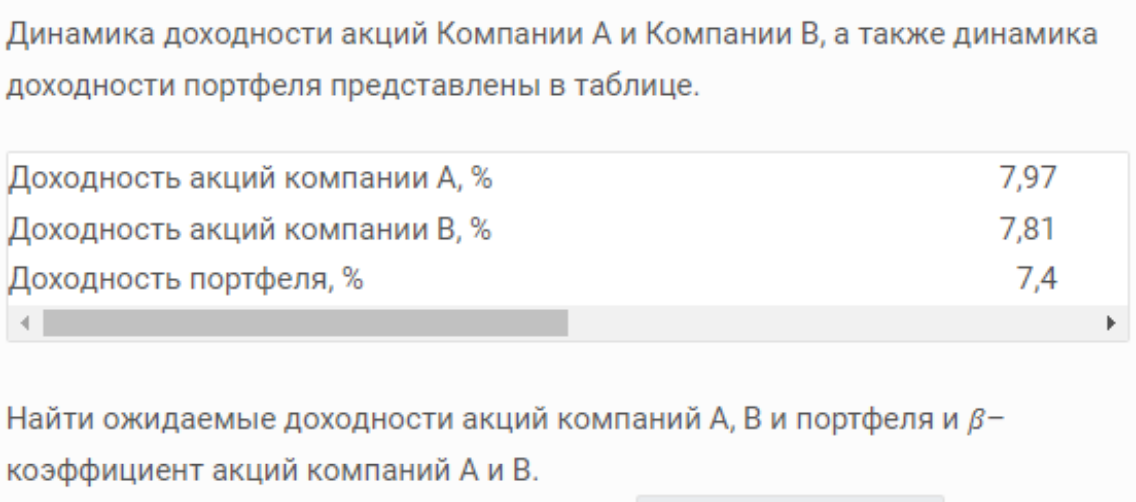

In [2]:
import sympy as sp

# Предполагаемые значения
risk_free_rate = 0.03  # замените на ваше значение безрисковой ставки
market_return = 0.10   # замените на ваше значение доходности портфеля

# Доходности акций
return_A = 0.0797  # Доходность акций Компании А
return_B = 0.0781  # Доходность акций Компании В

# Создаем символы для бета-коэффициентов
beta_A, beta_B = sp.symbols('beta_A beta_B')

# CAPM уравнения для акций A и B
eq1 = sp.Eq(return_A, risk_free_rate + beta_A * (market_return - risk_free_rate))
eq2 = sp.Eq(return_B, risk_free_rate + beta_B * (market_return - risk_free_rate))

# Решаем систему уравнений
solution = sp.solve((eq1, eq2), (beta_A, beta_B))

solution


{beta_A: 0.710000000000000, beta_B: 0.687142857142857}

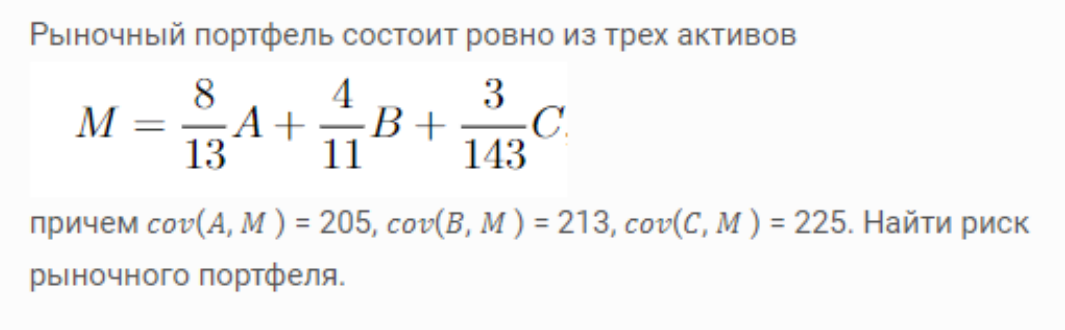

In [3]:
# Веса активов в портфеле
weight_A = 8 / 13
weight_B = 4 / 11
weight_C = 3 / 143

# Ковариации активов с рыночным портфелем
cov_A_M = 205
cov_B_M = 213
cov_C_M = 225

# Расчет дисперсии портфеля
variance_portfolio = (weight_A ** 2 * cov_A_M) + (weight_B ** 2 * cov_B_M) + (weight_C ** 2 * cov_C_M)

# Расчет стандартного отклонения (риска) портфеля
risk_portfolio = variance_portfolio ** 0.5

risk_portfolio


10.290648774404435

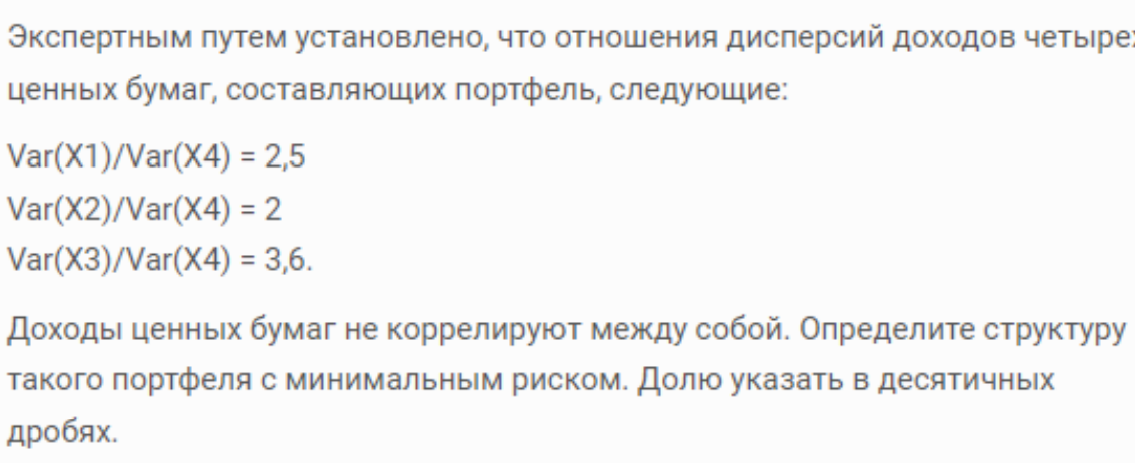

In [4]:
from scipy.optimize import minimize

# Функция для расчета дисперсии портфеля
def portfolio_variance(weights):
    var_X4 = 1  # Произвольно выбираем Var(X4) для удобства расчетов
    var_X1 = 2.5 * var_X4
    var_X2 = 2 * var_X4
    var_X3 = 3.6 * var_X4

    # Расчет дисперсии портфеля
    variance = (weights[0] ** 2 * var_X1) + (weights[1] ** 2 * var_X2) + \
               (weights[2] ** 2 * var_X3) + (weights[3] ** 2 * var_X4)
    return variance

# Начальное предположение весов
initial_weights = [0.25, 0.25, 0.25, 0.25]

# Ограничения: сумма весов должна быть равна 1
constraints = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})

# Границы весов: каждый вес должен быть между 0 и 1
bounds = [(0, 1) for _ in range(4)]

# Используем метод минимизации для нахождения оптимальных весов
optimal = minimize(portfolio_variance, initial_weights, bounds=bounds, constraints=constraints)

optimal_weights = optimal.x
optimal_weights


array([0.18367347, 0.22959184, 0.12755102, 0.45918368])

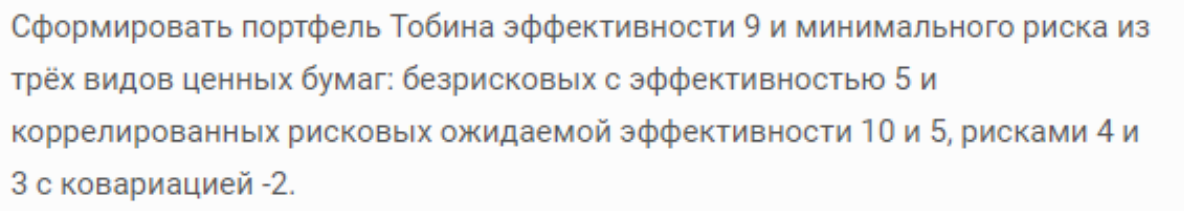

In [5]:
from scipy.optimize import minimize

# Заданные параметры
R_f = 0.05  # Доходность безрисковых ценных бумаг
R_1 = 0.10  # Ожидаемая доходность рисковой ценной бумаги 1
R_2 = 0.05  # Ожидаемая доходность рисковой ценной бумаги 2
sigma_1 = 4  # Риск (стандартное отклонение) ценной бумаги 1
sigma_2 = 3  # Риск (стандартное отклонение) ценной бумаги 2
cov_1_2 = -2  # Ковариация между рисковыми ценными бумагами

# Целевая ожидаемая доходность портфеля
target_return = 0.09

# Функция для расчета риска портфеля
def portfolio_risk(weights):
    w_f, w_1, w_2 = weights
    risk = (w_1 ** 2 * sigma_1 ** 2) + (w_2 ** 2 * sigma_2 ** 2) + (2 * w_1 * w_2 * cov_1_2)
    return risk

# Ограничение по доходности
def return_constraint(weights):
    w_f, w_1, w_2 = weights
    return w_f * R_f + w_1 * R_1 + w_2 * R_2 - target_return

# Ограничение на сумму весов
def weight_constraint(weights):
    return sum(weights) - 1

# Начальное предположение весов
initial_weights = [0.33, 0.33, 0.33]

# Ограничения
constraints = [
    {'type': 'eq', 'fun': return_constraint},
    {'type': 'eq', 'fun': weight_constraint}
]

# Границы весов
bounds = [(0, 1) for _ in range(3)]

# Оптимизация
optimal_portfolio = minimize(portfolio_risk, initial_weights, bounds=bounds, constraints=constraints)

optimal_weights = optimal_portfolio.x
optimal_weights, optimal_portfolio.fun


(array([0.02222227, 0.8       , 0.17777773]), 9.955555582790721)

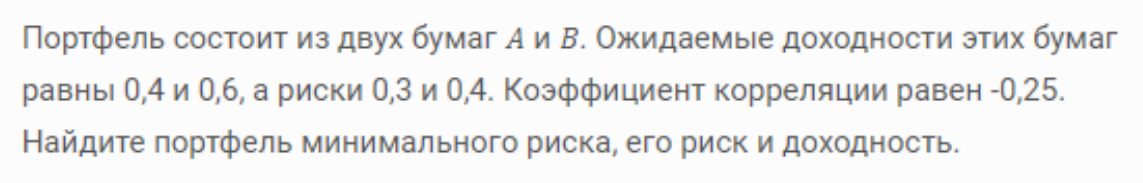

In [6]:
# Заданные параметры
R_A = 0.4  # Ожидаемая доходность бумаги А
R_B = 0.6  # Ожидаемая доходность бумаги В
sigma_A = 0.3  # Риск (стандартное отклонение) бумаги А
sigma_B = 0.4  # Риск (стандартное отклонение) бумаги В
rho_AB = -0.25  # Коэффициент корреляции между А и В

# Функция для расчета риска портфеля
def portfolio_risk(w_A):
    w_B = 1 - w_A
    risk = (w_A ** 2 * sigma_A ** 2) + (w_B ** 2 * sigma_B ** 2) + (2 * w_A * w_B * sigma_A * sigma_B * rho_AB)
    return risk ** 0.5

# Функция для расчета доходности портфеля
def portfolio_return(w_A):
    w_B = 1 - w_A
    return w_A * R_A + w_B * R_B

# Оптимизация для нахождения минимального риска
optimal_w_A = minimize(portfolio_risk, 0.5, bounds=[(0, 1)]).x[0]
optimal_w_B = 1 - optimal_w_A

# Риск и доходность оптимального портфеля
optimal_risk = portfolio_risk(optimal_w_A)
optimal_return = portfolio_return(optimal_w_A)

optimal_w_A, optimal_w_B, optimal_risk, optimal_return


(0.6129032220786713,
 0.3870967779213287,
 0.20868250309207573,
 0.47741935558426574)